In [ ]:
PROBLEM STATEMENT : Absence of insights for the relationship between 
student's economic background, academic performance, competence & expected salary

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [180]:
df = pd.read_csv('Data analyst Data.csv')

In [181]:
print(df.head())

  First Name           Email ID  Quantity                  Events   
0     ANIKET     aniket@xyz.com         1  Art of Resume Building  \
1  Dhanshree  dhanshree@xyz.com         1  Art of Resume Building   
2     Dhiraj     dhiraj@xyz.com         1  Art of Resume Building   
3      Pooja      pooja@xyz.com         1  Art of Resume Building   
4     Aayush     aayush@xyz.com         1  Art of Resume Building   

  Attendee Status                                       College Name   
0       Attending  D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...  \
1       Attending                   AP SHAH INSTITUTE OF TECHNOLOGY    
2       Attending       Don Bosco College of Engineering Fatorda Goa   
3       Attending           Pillai College of Engineering New Panvel   
4       Attending                               St Xavier's College    

        How did you come to know about this event?   
0                                            Email  \
1                                           

In [182]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Events                                                           4894 non-null   object 
 4   Attendee Status                                                  4894 non-null   object 
 5   College Name                                                     4879 non-null   object 
 6   How did you come to know about this event?                       2678 non-null   object 
 7   Specify in "Others" (how did you come to k

In [183]:
print(df.describe())

       Quantity  Year of Graduation         CGPA   
count    4894.0         4894.000000  4894.000000  \
mean        1.0         2024.176951     8.038476   
std         0.0            1.000180     1.005184   
min         1.0         2023.000000     6.200000   
25%         1.0         2023.000000     7.200000   
50%         1.0         2024.000000     7.900000   
75%         1.0         2025.000000     8.900000   
max         1.0         2026.000000     9.900000   

       Experience with python (Months)  Expected salary (Lac)  
count                      4894.000000            4894.000000  
mean                          5.395586              13.935635  
std                           1.705364               6.451959  
min                           3.000000               5.000000  
25%                           4.000000               8.000000  
50%                           5.000000              13.000000  
75%                           7.000000              19.000000  
max                

In [184]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Events                                                                0
Attendee Status                                                       0
College Name                                                         15
How did you come to know about this event?                         2216
Specify in "Others" (how did you come to know about this event)    4805
Designation                                                           0
Year of Graduation                                                    0
City                                                                  0
CGPA                                                                  0
Experience with python (Months)                                       0
Family Income                                  

In [185]:
# Replace missing values in 'Column_Name' with "Unknown"
df['College Name'].fillna('Unknown', inplace=True)

In [186]:
# Replace missing values in 'Column_Name' with "Unknown"
df['How did you come to know about this event?'].fillna('Unknown', inplace=True)

In [187]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Events                                                                0
Attendee Status                                                       0
College Name                                                          0
How did you come to know about this event?                            0
Specify in "Others" (how did you come to know about this event)    4805
Designation                                                           0
Year of Graduation                                                    0
City                                                                  0
CGPA                                                                  0
Experience with python (Months)                                       0
Family Income                                  

In [188]:
#BASIC QUESTIONS : 

#1.How many unique students are included in the dataset?

unique_students = df['Email ID'].nunique()
print("Number of unique students:", unique_students)

Number of unique students: 2157


In [189]:
#What is the average GPA of the students?

average_cgpa = df['CGPA'].mean()
print("Average GPA of students:", average_cgpa)



Average GPA of students: 8.038475684511647


In [190]:
#What is the distribution of students across different graduation years?

graduation_year_distribution = df['Year of Graduation'].value_counts()
print("Distribution of students by graduation year:\n", graduation_year_distribution)


Distribution of students by graduation year:
 Year of Graduation
2023    1536
2024    1511
2025    1292
2026     555
Name: count, dtype: int64


In [191]:
#What is the distribution of student's experience with Python programming?

python_experience_distribution = df['Experience with python (Months)'].value_counts()
print("Distribution of Python experience:\n", python_experience_distribution)


Distribution of Python experience:
 Experience with python (Months)
5    1242
3    1008
8     800
6     738
7     640
4     466
Name: count, dtype: int64


In [192]:

import pandas as pd
# Define a function to convert income ranges to numeric values
def convert_income(income_range):
    if income_range == '0-2 Lakh':
        return 100000  # Assuming the midpoint of the range is 1 Lakh (100,000)
    elif income_range == '7 Lakh':
        return 700000  # Assuming 7 Lakh directly represents 7 Lakh (700,000)
    else:
        return 0  # You can handle other cases as needed

# Apply the conversion function to the 'Family_Income' column
df['Family Income'] = df['Family Income'].apply(convert_income)

# Calculate the average family income
average_family_income = df['Family Income'].mean()

print("Average family income:", average_family_income)


Average family income: 92460.15529219453


In [193]:
#How does the GPA vary among different colleges? (Show top 5 results only)

top_colleges_cgpa = df.groupby('College Name')['CGPA'].mean().nlargest(5)
print("Top 5 colleges by average CGPA:\n", top_colleges_cgpa)


Top 5 colleges by average CGPA:
 College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64


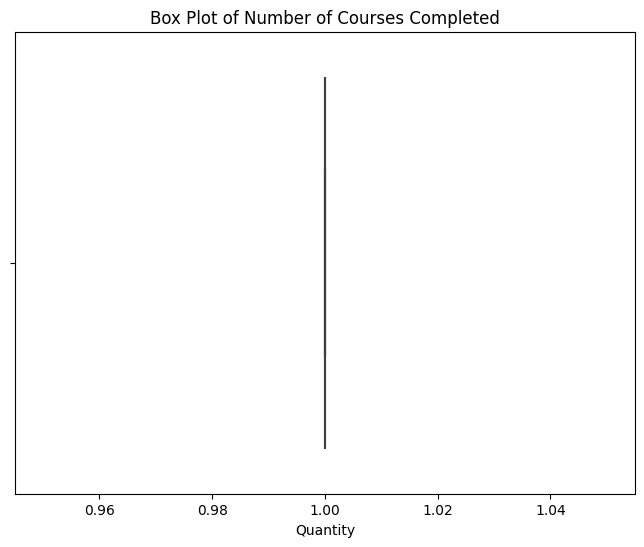

Number of outliers: 0
Outlier values:
Series([], Name: Quantity, dtype: int64)


In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define the column containing the number of courses completed
courses_completed_column = 'Quantity'

# Method 1: Using a Box Plot to Identify Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[courses_completed_column])
plt.title("Box Plot of Number of Courses Completed")
plt.xlabel(courses_completed_column)
plt.show()

# Method 2: Using Z-Score to Detect Outliers
z_scores = stats.zscore(df[courses_completed_column])
outliers = (z_scores > 3) | (z_scores < -3)

# Print the number of outliers and their values
outlier_count = outliers.sum()
outlier_values = df[courses_completed_column][outliers]
print(f"Number of outliers: {outlier_count}")
print(f"Outlier values:\n{outlier_values}")


In [195]:
#What is the average GPA for students from each city?

city_avg_cgpa = df.groupby('City')['CGPA'].mean().nlargest(10)
print("Average CGPA for students from each city:\n", city_avg_cgpa)


Average CGPA for students from each city:
 City
Kolhapur    8.557143
Raipur      8.507143
Sonipat     8.464286
Gurugram    8.459259
Puri        8.450000
Siwan       8.450000
Srinagar    8.435714
Delhi       8.414286
Pune        8.400000
Hasan       8.392857
Name: CGPA, dtype: float64


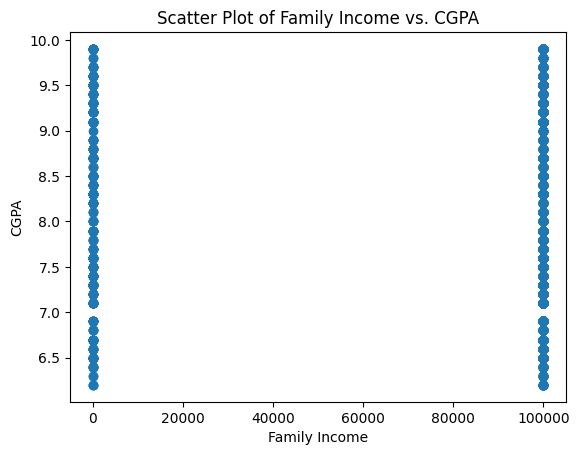

In [196]:
#Can we identify any relationship between family income and GPA?import numpy as np

import pandas as pd
import matplotlib.pyplot as plt


plt.scatter(df['Family Income'], df['CGPA'])
plt.xlabel('Family Income')
plt.ylabel('CGPA')
plt.title('Scatter Plot of Family Income vs. CGPA')
plt.show()




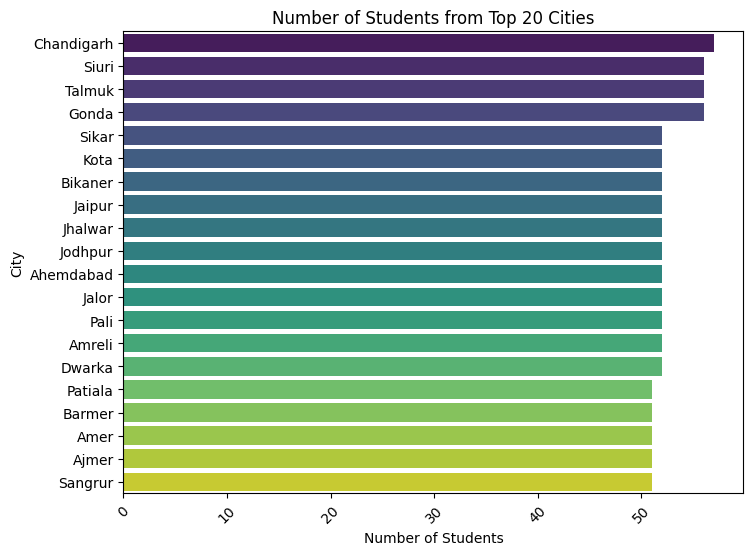

Number of students in each of the top 20 cities:
City
Chandigarh    57
Siuri         56
Talmuk        56
Gonda         56
Sikar         52
Kota          52
Bikaner       52
Jaipur        52
Jhalwar       52
Jodhpur       52
Ahemdabad     52
Jalor         52
Pali          52
Amreli        52
Dwarka        52
Patiala       51
Barmer        51
Amer          51
Ajmer         51
Sangrur       51
Name: count, dtype: int64


In [197]:
#How many students are from various cities? (Solve using data visualization tool)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming you have a column 'City' that contains city names

# Get the top 20 cities by student count
top_20_cities = df['City'].value_counts().nlargest(20)

# Create a bar plot to visualize the number of students in each of the top 20 cities
plt.figure(figsize=(8, 6))
sns.barplot(x=top_20_cities.values, y=top_20_cities.index, palette='viridis')
plt.title("Number of Students from Top 20 Cities")
plt.xlabel("Number of Students")
plt.ylabel("City")
plt.xticks(rotation=45)
plt.show()

# Print the count of students in each of the top 20 cities
print("Number of students in each of the top 20 cities:")
print(top_20_cities)



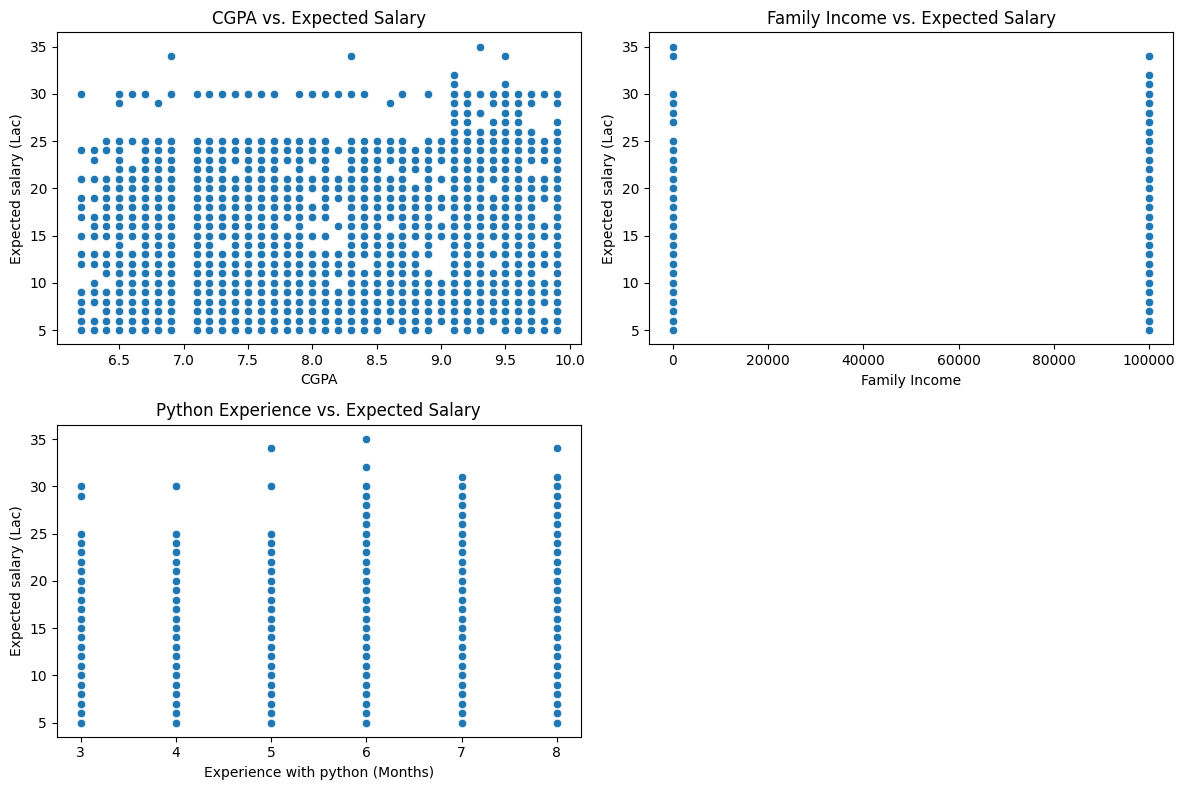

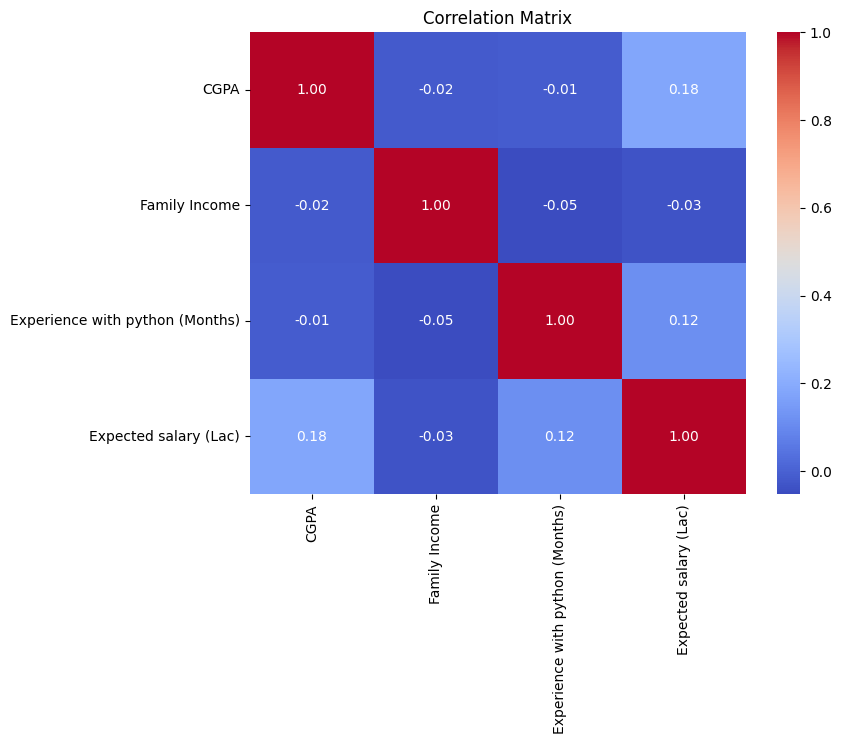

                                     CGPA  Family Income   
Experience with python (Months)                            
3                                8.052083   92559.523810  \
4                                7.983047   96351.931330   
5                                8.068599   93639.291465   
6                                8.066802   91327.913279   
7                                8.024375   94062.500000   
8                                7.992000   88000.000000   

                                 Expected salary (Lac)  
Experience with python (Months)                         
3                                            13.192460  
4                                            13.392704  
5                                            12.993559  
6                                            14.834688  
7                                            15.054688  
8                                            14.926250  


In [198]:
#How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with Python (Months)'?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Specify the columns of interest
columns_of_interest = ['CGPA', 'Family Income', 'Experience with python (Months)', 'Expected salary (Lac)']

# Filter out rows with missing data in any of the specified columns
df_cleaned = df.dropna(subset=columns_of_interest)

# Method 1: Scatter plots to visualize the relationships
plt.figure(figsize=(12, 8))

# Plot GPA vs. Expected Salary
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_cleaned, x='CGPA', y='Expected salary (Lac)')
plt.title('CGPA vs. Expected Salary')

# Plot Family Income vs. Expected Salary
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_cleaned, x='Family Income', y='Expected salary (Lac)')
plt.title('Family Income vs. Expected Salary')

# Plot Python Experience vs. Expected Salary
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_cleaned, x='Experience with python (Months)', y='Expected salary (Lac)')
plt.title('Python Experience vs. Expected Salary')

plt.tight_layout()
plt.show()

# Method 2: Calculate correlation coefficients
correlation_matrix = df_cleaned[columns_of_interest].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Method 3: Summary statistics
summary_stats = df_cleaned.groupby('Experience with python (Months)').agg({'CGPA': 'mean', 'Family Income': 'mean', 'Expected salary (Lac)': 'mean'})
print(summary_stats)


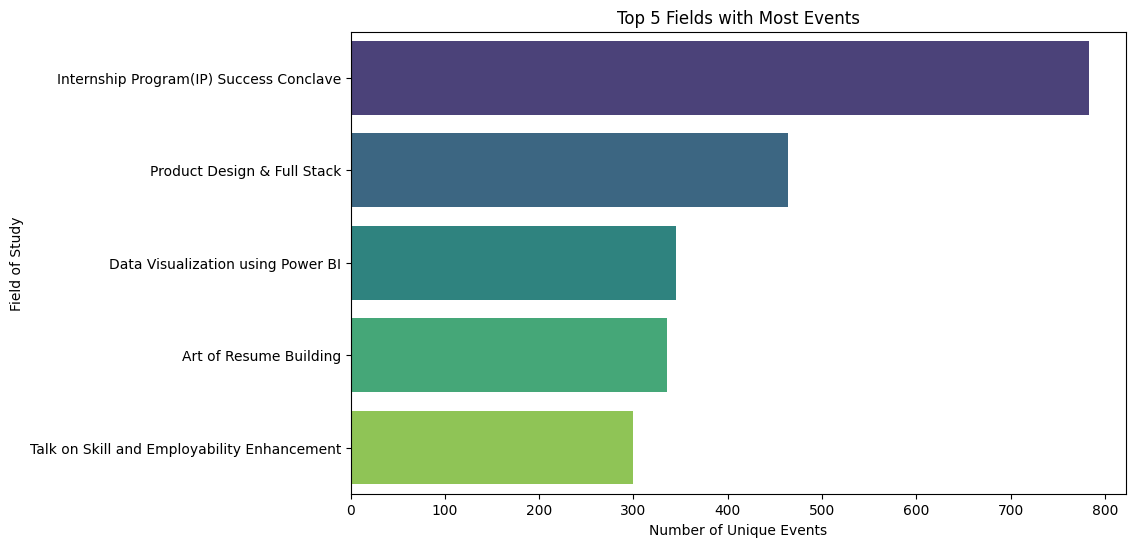

In [204]:
#Which event tends to attract more students from specific fields of study?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming you have columns 'Field_of_Study' and 'Event_Name'
fields_events_df = df[['Events', 'Email ID']]

# Group by 'Field_of_Study' and count the number of unique events in each field
field_event_counts = fields_events_df.groupby('Events')['Email ID'].nunique()

# Sort the fields by the number of unique events in descending order
sorted_fields = field_event_counts.sort_values(ascending=False)

# Select the top N fields (adjust N as needed)
top_N = 5
top_fields = sorted_fields.head(top_N)

# Plot a bar chart to visualize which fields have the most events
plt.figure(figsize=(10, 6))
sns.barplot(x=top_fields.values, y=top_fields.index, palette='viridis')
plt.title(f"Top {top_N} Fields with Most Events")
plt.xlabel("Number of Unique Events")
plt.ylabel("Field of Study")
plt.show()


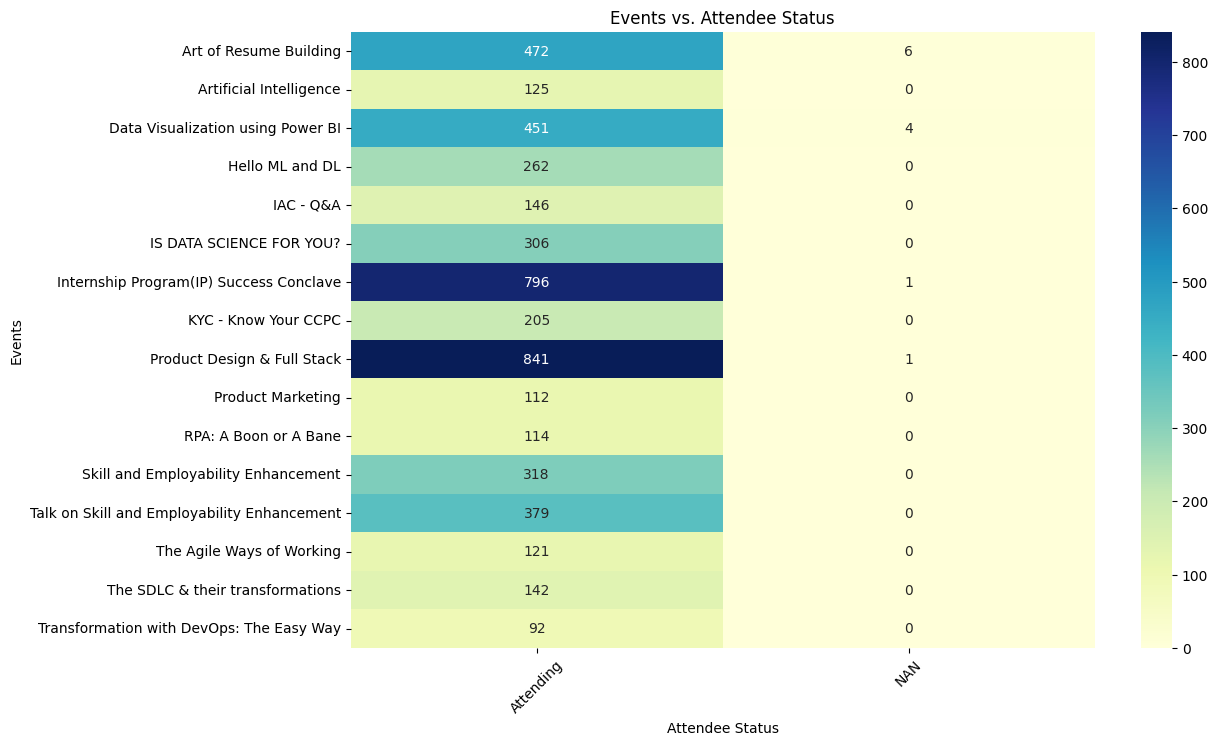

In [205]:
#Which event tends to attract more students from specific fields of study?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Assuming you have columns 'Field_of_Study' and 'Event_Attended'

# Group the data by 'Field_of_Study' and 'Event_Attended' and count the number of students in each combination
field_event_counts = df.groupby(['Events', 'Attendee Status']).size().reset_index(name='Student_Count')

# Pivot the data to create a matrix where rows represent fields of study, columns represent events, and values represent student counts
pivot_table = field_event_counts.pivot(index='Events', columns='Attendee Status', values='Student_Count').fillna(0)

# Plot a heatmap to visualize which events attract more students from specific fields of study
plt.figure(figsize=(12, 8))
sns.heatmap(data=pivot_table, cmap='YlGnBu', annot=True, fmt='g', cbar=True)
plt.title('Events vs. Attendee Status')
plt.xlabel('Attendee Status')
plt.ylabel('Events')
plt.xticks(rotation=45)
plt.show()




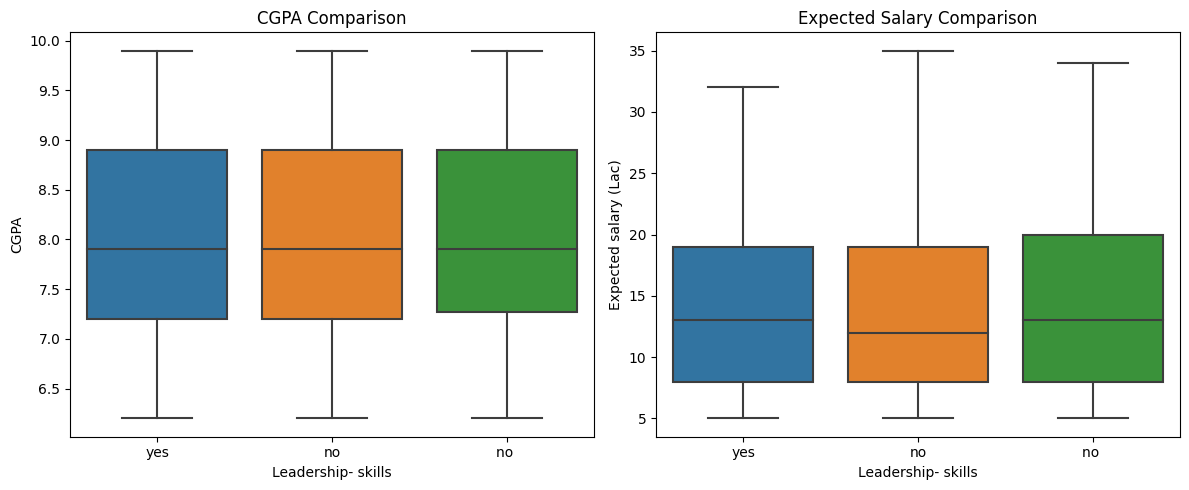

T-test results for CGPA:
T-statistic: nan
P-value: nan

T-test results forExpected salary (Lac):
T-statistic: nan
P-value: nan

The difference in GPA between leadership and non-leadership students is not statistically significant.
The difference in Expected Salary between leadership and non-leadership students is not statistically significant.


In [206]:
#Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Separate students with and without leadership positions
leadership_students = df[df['Leadership- skills'] == 1]
non_leadership_students = df[df['Leadership- skills'] == 0]

# Perform a t-test to compare GPA between students with and without leadership positions
gpa_t_statistic, gpa_p_value = ttest_ind(leadership_students['CGPA'], non_leadership_students['CGPA'], equal_var=False)

# Perform a t-test to compare Expected Salary between students with and without leadership positions
salary_t_statistic, salary_p_value = ttest_ind(leadership_students['Expected salary (Lac)'], non_leadership_students['Expected salary (Lac)'], equal_var=False)

# Visualize the differences in GPA and Expected Salary
plt.figure(figsize=(12, 5))

# Plot GPA comparison
plt.subplot(1, 2, 1)
sns.boxplot(x='Leadership- skills', y='CGPA', data=df)
plt.title('CGPA Comparison')

# Plot Expected Salary comparison
plt.subplot(1, 2, 2)
sns.boxplot(x='Leadership- skills', y='Expected salary (Lac)', data=df)
plt.title('Expected Salary Comparison')

plt.tight_layout()
plt.show()

# Print the results of the t-tests
print(f'T-test results for CGPA:\nT-statistic: {gpa_t_statistic}\nP-value: {gpa_p_value}\n')
print(f'T-test results forExpected salary (Lac):\nT-statistic: {salary_t_statistic}\nP-value: {salary_p_value}\n')

# Determine if the differences are statistically significant
alpha = 0.05
if gpa_p_value < alpha:
    print('The difference in GPA between leadership and non-leadership students is statistically significant.')
else:
    print('The difference in GPA between leadership and non-leadership students is not statistically significant.')

if salary_p_value < alpha:
    print('The difference in Expected Salary between leadership and non-leadership students is statistically significant.')
else:
    print('The difference in Expected Salary between leadership and non-leadership students is not statistically significant.')


In [207]:
#How many students are graduating by the end of 2024?

import pandas as pd

# Filter the DataFrame to include only students graduating by the end of 2024
end_of_2024 = df[df['Year of Graduation'] <= 2024]

# Count the number of students in the filtered DataFrame
num_students_graduating_by_2024 = end_of_2024.shape[0]

# Print the result
print(f"Number of students graduating by the end of 2024: {num_students_graduating_by_2024}")


Number of students graduating by the end of 2024: 3047


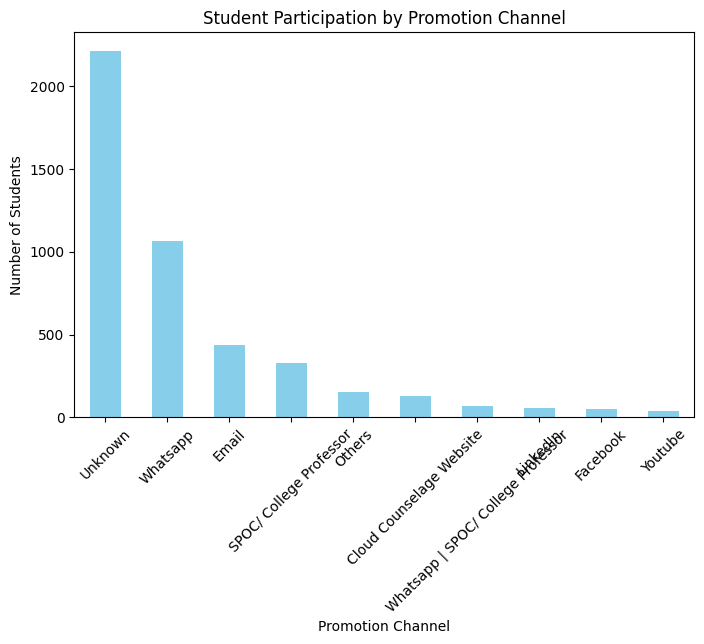

In [208]:
#Which promotion channel brings in more student participations for the event?

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Promotion_Channel' is the column indicating promotion channels
promotion_counts = df['How did you come to know about this event?'].value_counts().nlargest(10)

# Plot the counts
plt.figure(figsize=(8, 5))
promotion_counts.plot(kind='bar', color='skyblue')
plt.title('Student Participation by Promotion Channel')
plt.xlabel('Promotion Channel')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [209]:
#Find the total number of students who attended the events related to Data Science? (From all Data Science related courses.)


# Filter the dataset for Data Science related courses or events
data_science_related = df[df['Events'].str.contains('Data Science', case=False)]

# Count the unique students who attended Data Science related courses or events
unique_students_attended_data_science = data_science_related['Email ID'].nunique()

# Print the total number of students who attended Data Science related courses or events
print("Total number of students who attended Data Science related courses or events:", unique_students_attended_data_science)


Total number of students who attended Data Science related courses or events: 218


In [210]:
#Those who have high CGPA & More experience in language tend to have higher expectations for performance, competence & expected salary?

import pandas as pd

# Define thresholds for high CGPA and language experience
high_cgpa_threshold = 9  # Adjust this threshold as needed
language_experience_threshold = 7  # Adjust this threshold as needed (e.g., 24 months)

# Create two groups: one with high CGPA and more language experience, and one without
high_cgpa_experience = df[(df['CGPA'] >= high_cgpa_threshold) & (df['Experience with python (Months)'] >= language_experience_threshold)]
low_cgpa_experience = df[(df['CGPA'] < high_cgpa_threshold) | (df['Experience with python (Months)'] < language_experience_threshold)]

# Calculate average values for each group
avg_performance_high = high_cgpa_experience['CGPA'].mean()
avg_performance_low = low_cgpa_experience['CGPA'].mean()

avg_salary_high = high_cgpa_experience['Expected salary (Lac)'].mean()
avg_salary_low = low_cgpa_experience['Expected salary (Lac)'].mean()

# Print the results
print("Average Performance Expectation (High CGPA & Experience):", avg_performance_high)
print("Average Performance Expectation (Low CGPA or Experience):", avg_performance_low)

print("Average Expected Salary (High CGPA & Experience):", avg_salary_high)
print("Average Expected Salary (Low CGPA or Experience):", avg_salary_low)


Average Performance Expectation (High CGPA & Experience): 9.390718562874252
Average Performance Expectation (Low CGPA or Experience): 7.939429824561403
Average Expected Salary (High CGPA & Experience): 20.979041916167663
Average Expected Salary (Low CGPA or Experience): 13.419736842105262


In [211]:
#How many students know about the event from their colleges? Which of these Top 5 colleges?

import pandas as pd


# Filter the DataFrame to include only students who learned about the event from their colleges
college_aware_students = df[df['How did you come to know about this event?'] == 'Others']

# Count the number of students who learned about the event from their colleges
num_college_aware_students = len(college_aware_students)

print("Number of students who know about the event from their colleges:", num_college_aware_students)

# Find the top 5 colleges by the number of students who learned about the event from their colleges
top_5_colleges = college_aware_students['College Name'].value_counts().nlargest(5)

print("Top 5 colleges by the number of students who learned about the event from their colleges:\n", top_5_colleges)



Number of students who know about the event from their colleges: 153
Top 5 colleges by the number of students who learned about the event from their colleges:
 College Name
vishwakarma institute of technology, pune                10
wilson college                                            8
symbiosis institute of technology, pune                   7
vidyalankar institute of technology, mumbai               7
kle society's college of bca, rls institute, belagavi     6
Name: count, dtype: int64
